In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma #gamma function


# constants cgs units 
c = 2.998e10 # cm/s 
eta = 0.1 # big n looking thing, no units
q = 5e-10 # eso # cgs units # charge of an electron
m_e = 9.109e-28 # mass of electron in grams
G = 6.67e-8 # cgs units
solar_mass = 1.989e+33 # grams
m_sgrA = 4.31e6 # solar mass
cross_section = 7e-25   #cm^2
m_p =  1.6726e-24 # g



#####
p = 2 # given in problem

### Problem 4 Coding section

In [2]:

# fuctions

def radius_t(t, beta, R_0):
    """
    Calculate the radius of an expanding blob at time t.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter frac of c.
    - R_0 (float): Initial radius.

    Returns:
    float: Radius at time t.
    """
    return  R_0 + beta*c *t

def constant_t(t, beta, R_0):
    """
    Calculate a constant value used in other calculations.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.

    Returns:
    float: Constant value.
    """
    r = radius_t(t, beta, R_0)
    constant = (eta * L_edd * R_0) / (24 *np.log(10) * np.pi * r**3 *c*beta)
    return constant

def u_b(t, beta, R_0):
    '''
    Calculates the energy density caused by magnetisim
    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.

    Returns:
    float: energy density caused by magnetisim.
    """'''
    r = radius_t(t, beta, R_0)
    my_ub = (eta * L_edd) / (8 *r**3 *c*beta)
    return my_ub


def alpha_v(t, beta, R_0, freq, alpha=0.5 * np.pi):

    """
    Calculate the absorption coefficient.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.
    - freq (float): Frequency of radiation.
    - alpha (float, optional): Angle of observation. Defaults to 0.5 * np.pi.

    Returns:
    float: Absorption coefficient.
    """
    # absorption coef
    # equation 6.53 in the textbook
    term1 = (np.sqrt(3)* q**3) / (8 * np.pi * m_e )
    term2 = ((3*q) / (2*np.pi *m_e**3 *c**5))**(p/2)
    B = np.sqrt(u_b(t, beta, R_0) * 8 * np.pi)
    term3 = constant_t(t, beta, R_0) * (B *np.sin(alpha))**((p+2)/2)
    term4 = gamma((3*p+2 /12))
    term5 = gamma((3*p+22 /12))
    term6 = freq**(-1*(p+4)/2)

    return term1 * term2 * term3 * term4 * term5 * term6


def p_tot(t, beta, R_0, freq, alpha=0.5 * np.pi):
    """
    Calculate the total power per unit volume per unit frequency.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.
    - freq (float): Frequency of radiation.
    - alpha (float, optional): Angle of observation. Defaults to 0.5 * np.pi.

    Returns:
    float: Total power per unit volume per unit frequency.
    """

    # equation 6.36 in the book
    # total power per unit volume per unit freq
    B = np.sqrt(u_b(t, beta, R_0) * 8 * np.pi)
    C = constant_t(t, beta, R_0)

    term1 = (np.sqrt(3)*q**3 *C *B * np.sin(alpha))/ (2 *np.pi* m_e*c**2 * (p+1))
    term2 = gamma(p/4 + 19/12)
    term3 = gamma(p/4 - 1/12)
    term4 = ((m_e*c*2*np.pi*freq)/(3*q*B*np.sin(alpha)))**(-(p-1)/2)
    return term1*term2*term3*term4



def source_function(t, beta, R_0, freq, alpha=0.5 * np.pi):
    """
    Calculate the source function.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.
    - freq (float): Frequency of radiation.
    - alpha (float, optional): Angle of observation. Defaults to 0.5 * np.pi.

    Returns:
    float: Source function.
    """
    ## calculates the source function
    ## equation 6.54 

    obs_v = alpha_v(t, beta, R_0, freq, alpha=0.5 * np.pi)
    power_v = p_tot(t, beta, R_0, freq, alpha=0.5 * np.pi) / (4 *np.pi)

    return power_v / obs_v




def spefific_intenstiy(t, beta, R_0, freq, alpha=0.5 * np.pi):
    """
    Calculate the specific intensity.

    Parameters:
    - t (float): Time.
    - beta (float): Expansion parameter.
    - R_0 (float): Initial radius.
    - freq (float): Frequency of radiation.
    - alpha (float, optional): Angle of observation. Defaults to 0.5 * np.pi.

    Returns:
    float: Specific intensity.
    """

    S_v = source_function(t, beta, R_0, freq, alpha=0.5 * np.pi)
    r = radius_t(t, beta, R_0)
    tau = alpha_v(t, beta, R_0, freq, alpha=0.5 * np.pi) * r

    return S_v*(1-np.exp(-tau))

In [3]:
t = np.linspace(0, 1000, 1000)
freq = np.logspace(0, 12, 1000)
beta = 0.3 
R_0 = 10* (G * m_sgrA*solar_mass/ c**2)

L_edd = 4 * np.pi * G * m_sgrA*solar_mass *c *m_p/ cross_section

I_v = spefific_intenstiy(t, beta, R_0, freq, alpha=0.5 * np.pi)

In [9]:
t = np.linspace(0, 10000, 100000)
t = t.reshape(-1, 1) # reshape vector
freq = np.logspace(-6, 25, 100000)
beta = 0.3 
R_0 = 10* (G * m_sgrA*solar_mass/ c**2)
L_edd = 4 * np.pi * G * m_sgrA*solar_mass *c *m_p/ cross_section
I_v = spefific_intenstiy(t, beta, R_0, freq, alpha=0.5 * np.pi)

plt.figure(figsize=(8,6), dpi=300)
plt.plot(freq, I_v)

freq_test = np.logspace(-6, 8, 1000)
plt.plot(freq_test, freq_test**(5/2), label='I_v~ freq^(5/2)')

freq_test = np.logspace(12, 16, 100)
plt.plot(freq_test, freq_test**(-1 *( 3/2)), label='I_v~ freq^-1(p-1)/2')


plt.xlabel("Frequency (Hz)", size=15)
plt.ylabel('spefific_intenstiy (CGS Units)', size=15)
plt.title('Spefific intenstiy vs freq of the blob', size=15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-4), 10**(17))
plt.legend()
plt.savefig('hail_sagan_42069.pdf',bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,6), dpi=300)
plt.plot(t, I_v)

# need to integrate over I_v to get lightcurve

plt.xlabel("Time (s)", size=15)
plt.ylabel('spefific_intenstiy (CGS Units)', size=15)
plt.title('Spefific intenstiy vs time of the blob', size=15)
plt.yscale('log')
plt.xscale('log')
plt.savefig('hail_sagan_42069_time.pdf',bbox_inches='tight')




MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

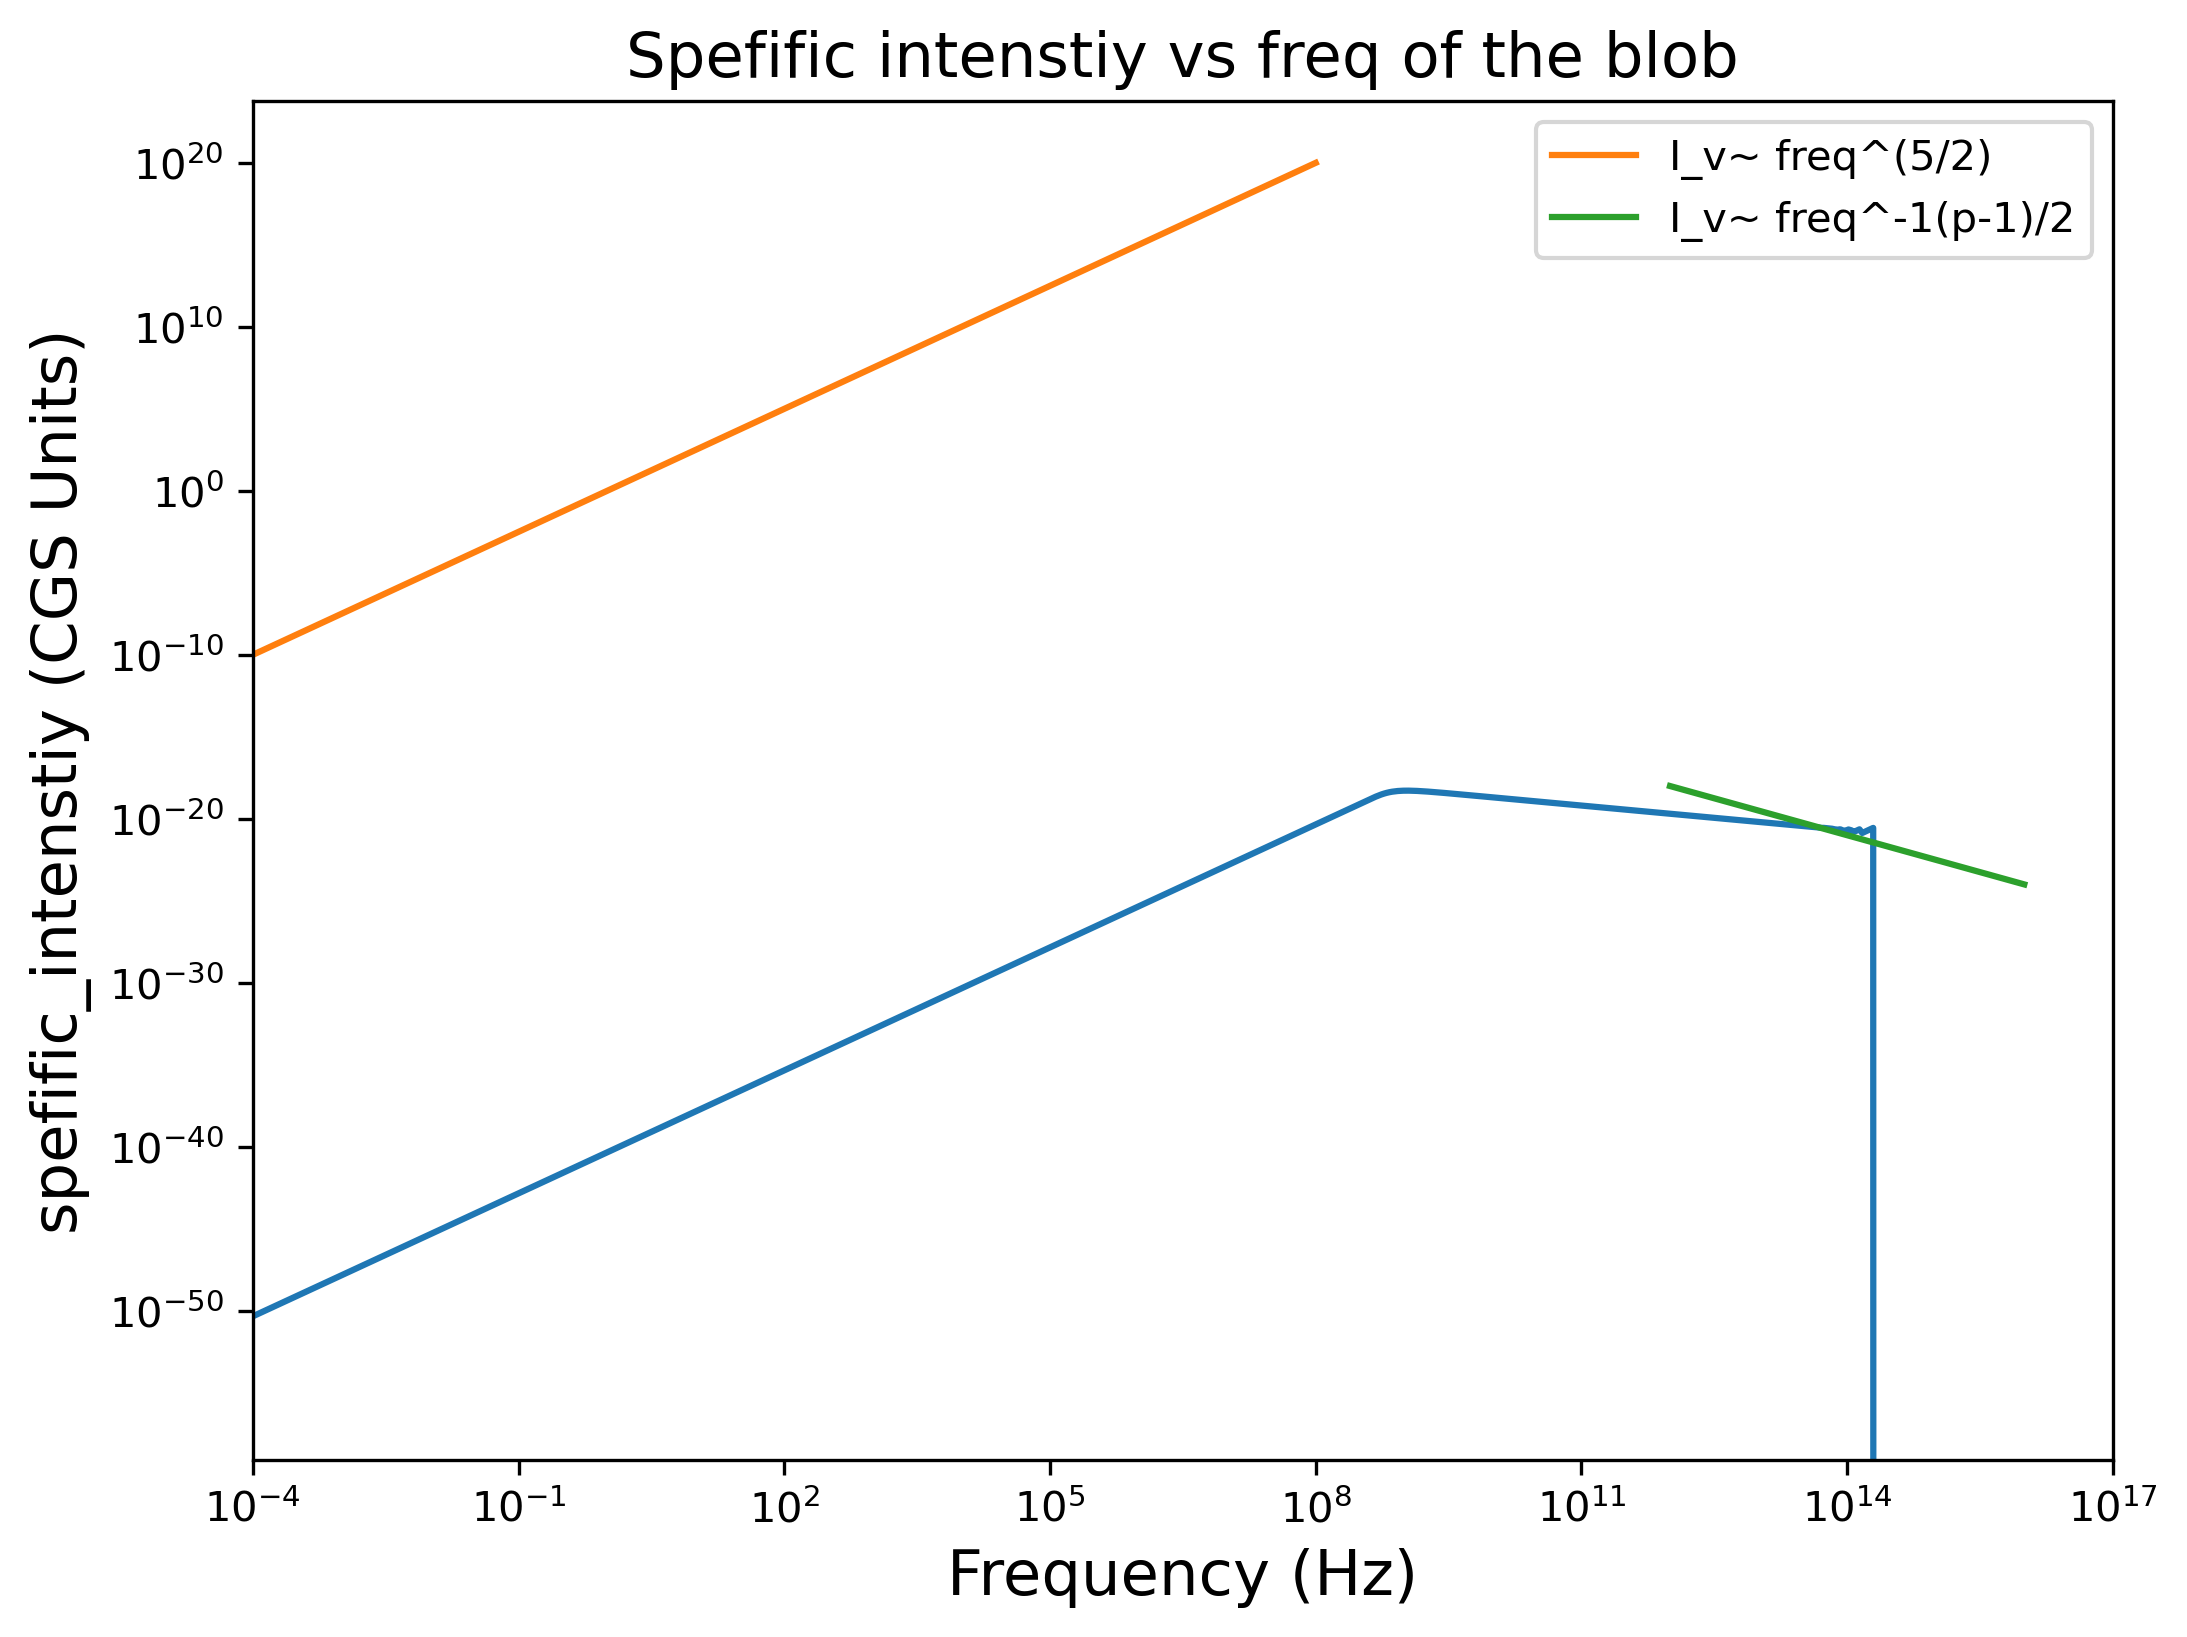

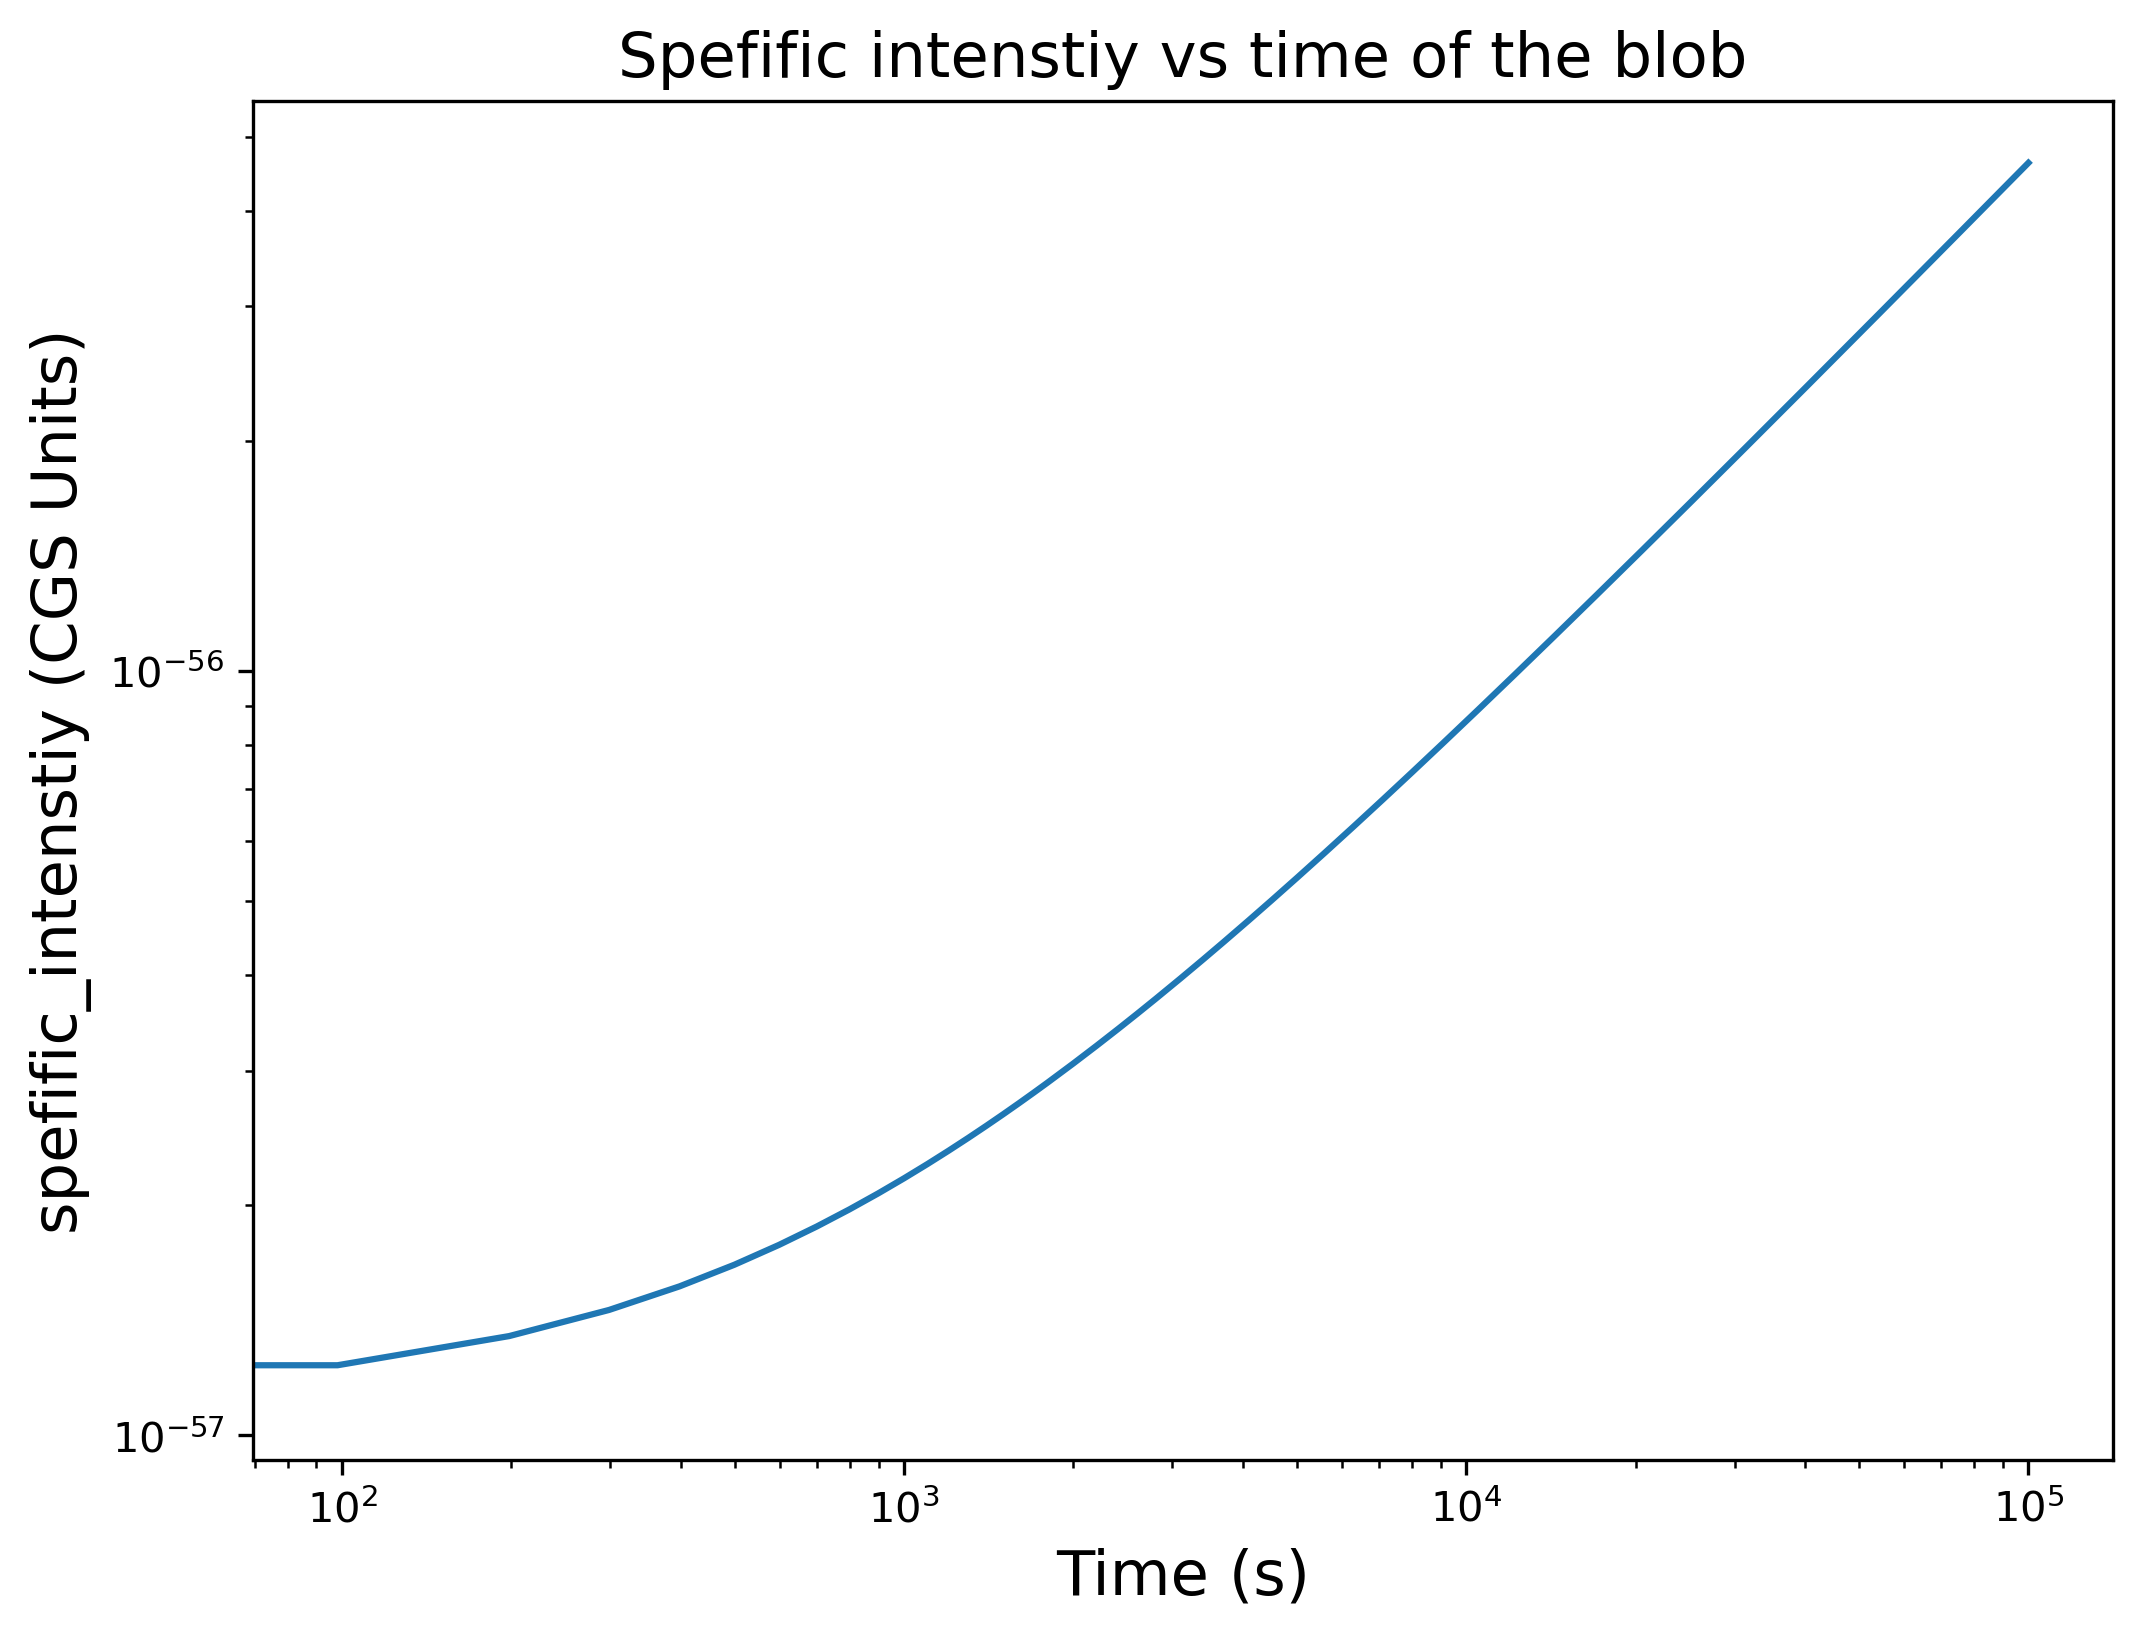

In [24]:
t = np.linspace(-2, 100000, 1000)
t = t[:, None] # reshape vector
freq = np.logspace(-6, 25, 1000)
beta = 0.3 
R_0 = 10* (G * m_sgrA*solar_mass/ c**2)
L_edd = 4 * np.pi * G * m_sgrA*solar_mass *c *m_p/ cross_section
I_v = spefific_intenstiy(t, beta, R_0, freq, alpha=0.5 * np.pi)

plt.figure(figsize=(8,6), dpi=300)
plt.plot(freq, I_v[-1, :])

freq_test = np.logspace(-6, 8, 1000)
plt.plot(freq_test, freq_test**(5/2), label='I_v~ freq^(5/2)')

freq_test = np.logspace(12, 16, 100)
plt.plot(freq_test, freq_test**(-1 *( 3/2)), label='I_v~ freq^-1(p-1)/2')


plt.xlabel("Frequency (Hz)", size=15)
plt.ylabel('spefific_intenstiy (CGS Units)', size=15)
plt.title('Spefific intenstiy vs freq of the blob', size=15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**(-4), 10**(17))
plt.legend()
plt.savefig('hail_sagan_42069.pdf',bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,6), dpi=300)
plt.plot(t, I_v[:, 0])

# need to integrate over I_v to get lightcurve

plt.xlabel("Time (s)", size=15)
plt.ylabel('spefific_intenstiy (CGS Units)', size=15)
plt.title('Spefific intenstiy vs time of the blob', size=15)
plt.yscale('log')
plt.xscale('log')
plt.savefig('hail_sagan_42069_time.pdf',bbox_inches='tight')


